In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
pd.option_context('mode.use_inf_as_na', True)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning )

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
olist_customers_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
olist_orders_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
olist_order_items_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
olist_geolocation_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
olist_products_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
product_category_name_translation=  pd.read_csv('./kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')
olist_order_payments_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])
filter1 = olist_orders_dataset['order_purchase_timestamp'] > '2016-12-31'
filter2 = olist_orders_dataset['order_purchase_timestamp'] < '2018-09-1'
filter3 = ~olist_orders_dataset['order_status'].isin(['unavailable' ,'canceled']) ## not in condition
olist_orders_dataset = olist_orders_dataset[(filter1 & filter2 & filter3)] ### order between 2017 and 2018 and ordered.
print('numbers of orders : ', olist_orders_dataset.shape[0])
print('first order : '  , olist_orders_dataset['order_purchase_timestamp'].min())
print('last order : ' , olist_orders_dataset['order_purchase_timestamp'].max())

numbers of orders :  97910
first order :  2017-01-05 11:56:06
last order :  2018-08-29 15:00:37


Required joins for more informations

In [5]:
ordered_product_details = pd.merge( olist_orders_dataset, olist_order_items_dataset, on='order_id', how='inner'  ) ## only for filtered items
ordered_product_details = pd.merge( ordered_product_details, olist_products_dataset, on='product_id', how='left' ) # for product details
ordered_product_details = pd.merge( ordered_product_details, olist_customers_dataset, on='customer_id', how='left' ) # for customer details   
ordered_product_details = pd.merge( ordered_product_details, product_category_name_translation, on='product_category_name', how='left' ) # for customer details

In [6]:
ordered_product_details.info()
# ordered_product_details['customer_zip_code_prefix'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111752 entries, 0 to 111751
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111752 non-null  object        
 1   customer_id                    111752 non-null  object        
 2   order_status                   111752 non-null  object        
 3   order_purchase_timestamp       111752 non-null  datetime64[ns]
 4   order_approved_at              111737 non-null  object        
 5   order_delivered_carrier_date   111052 non-null  object        
 6   order_delivered_customer_date  109872 non-null  object        
 7   order_estimated_delivery_date  111752 non-null  object        
 8   order_item_id                  111752 non-null  int64         
 9   product_id                     111752 non-null  object        
 10  seller_id                      111752 non-null  object        
 11  

In [7]:
category_city_customer = ordered_product_details[['order_id' , 'product_id' , 'order_purchase_timestamp' ,  'customer_city' , 'product_category_name_english'  ]]

In [9]:
import plotly.express as px
customer_city = category_city_customer['customer_city'].value_counts().to_frame()
# Assuming customer_city is a DataFrame
customer_city['cumulative'] = customer_city['count'].cumsum()

# Plotting the line plot using Plotly
fig = px.line(customer_city, x= range(len(customer_city.index)), y='cumulative', title='Cumulative Items Sold by City')
fig.update_xaxes(title='Index')
fig.update_yaxes(title='Cumulative Values')
fig.show()
customer_city

,count,cumulative
customer_city,,
sao paulo,17634,17634
rio de janeiro,7768,25402
belo horizonte,3116,28518
brasilia,2375,30893
curitiba,1730,32623
...,...,...
marques de souza,1,111748
alto piquiri,1,111749
general camara,1,111750


## There are around 500 cities are important and 25 categories to focus more.

In [10]:
customer_city

,count,cumulative
customer_city,,
sao paulo,17634,17634
rio de janeiro,7768,25402
belo horizonte,3116,28518
brasilia,2375,30893
curitiba,1730,32623
...,...,...
marques de souza,1,111748
alto piquiri,1,111749
general camara,1,111750


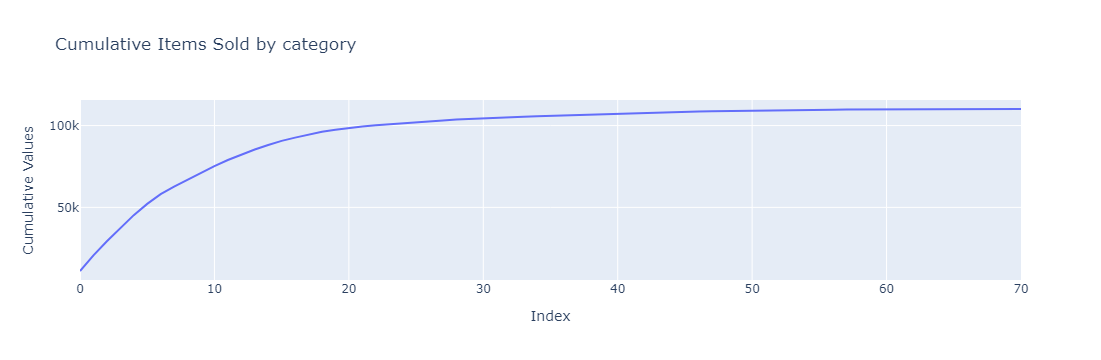

In [11]:
important_category = category_city_customer['product_category_name_english'].value_counts().to_frame()
important_category['cumulative'] = important_category['count'].cumsum()
# Plotting the line plot using Plotly
fig = px.line(important_category, x= range(len(important_category.index)), y='cumulative', title='Cumulative Items Sold by category')
fig.update_xaxes(title='Index')
fig.update_yaxes(title='Cumulative Values')
fig.show()

In [12]:
important_category

,count,cumulative
product_category_name_english,,
bed_bath_table,11089,11089
health_beauty,9585,20674
sports_leisure,8573,29247
furniture_decor,8229,37476
computers_accessories,7760,45236
...,...,...
arts_and_craftmanship,24,110105
la_cuisine,14,110119
cds_dvds_musicals,14,110133


25 categories are optimum value here.

In [13]:
top_city = customer_city.index[:5]
top_category = important_category.index[:25]
top_category
f1 = category_city_customer['customer_city'].isin(top_city) ## top city and cateogry
f2 = category_city_customer['product_category_name_english'].isin(top_category)
df = category_city_customer[(f1 & f2)]
pivot_table=pd.pivot_table(df , values='order_id' , index='product_category_name_english' , columns = 'customer_city', aggfunc='count')                                                     

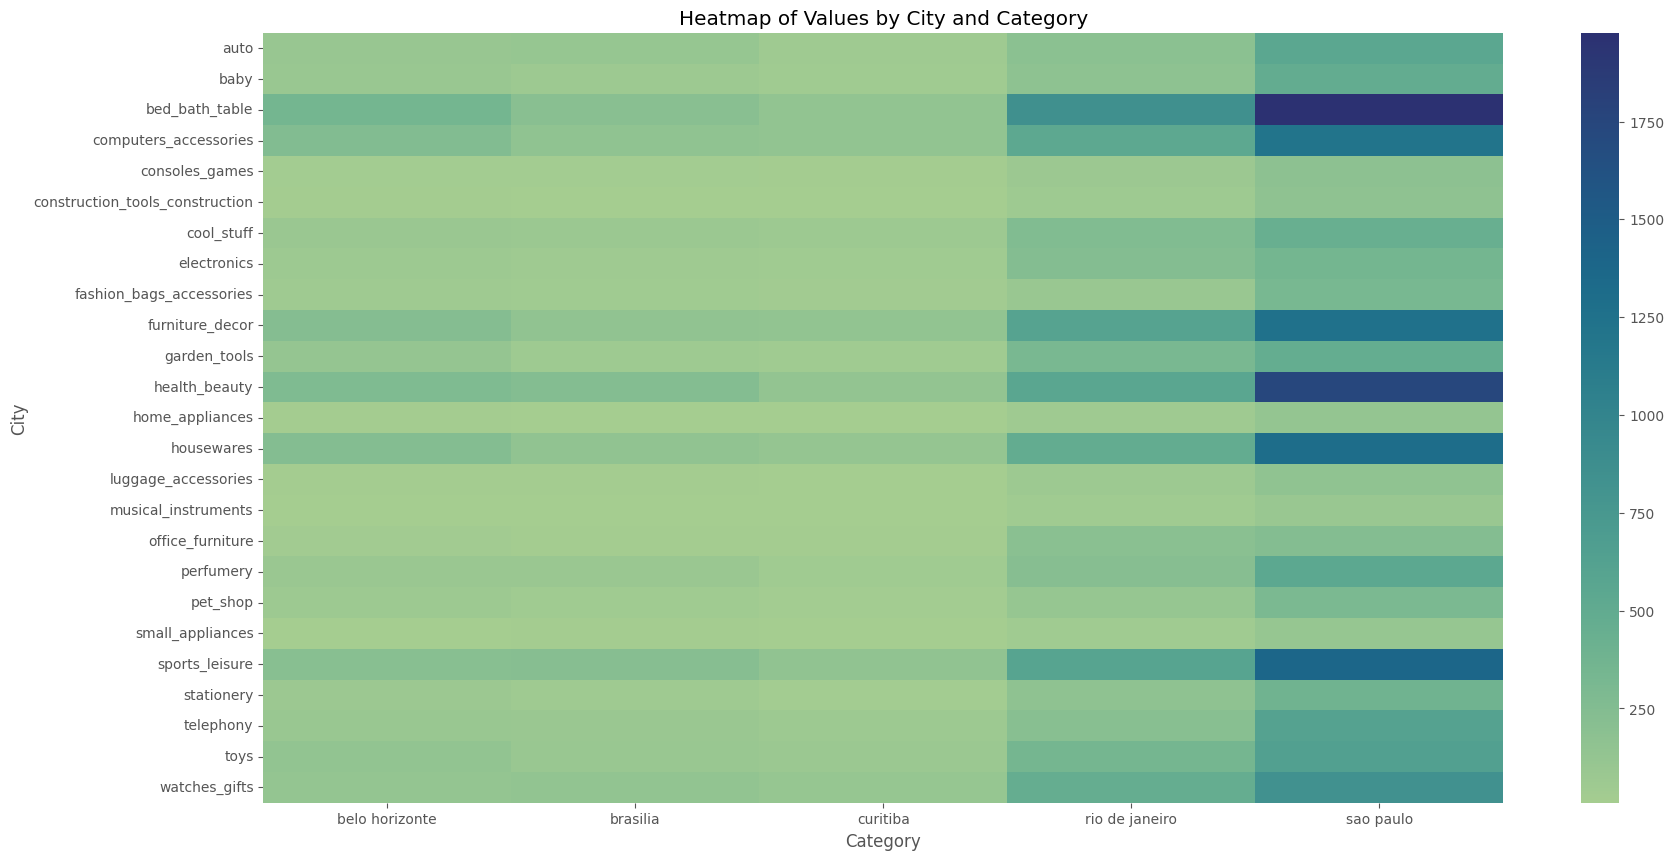

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming you have 'pivot_table' from the previous example
# If not, you can create a sample DataFrame and pivot_table as follows:
# pivot_table = pd.pivot_table(df, values='Value', index='Date', columns='Category', aggfunc='sum')


# Plotting the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(pivot_table, cmap='crest', fmt=".1f")
plt.title('Heatmap of Values by City and Category')
plt.xlabel('Category')
plt.ylabel('City')
plt.show()

In [15]:
f1 = category_city_customer['customer_city'] == 'recife'
f2 = category_city_customer['product_category_name_english'] == 'small_appliances'
category_city_customer[ (f1 & f2 ) ]

,order_id,product_id,order_purchase_timestamp,customer_city,product_category_name_english


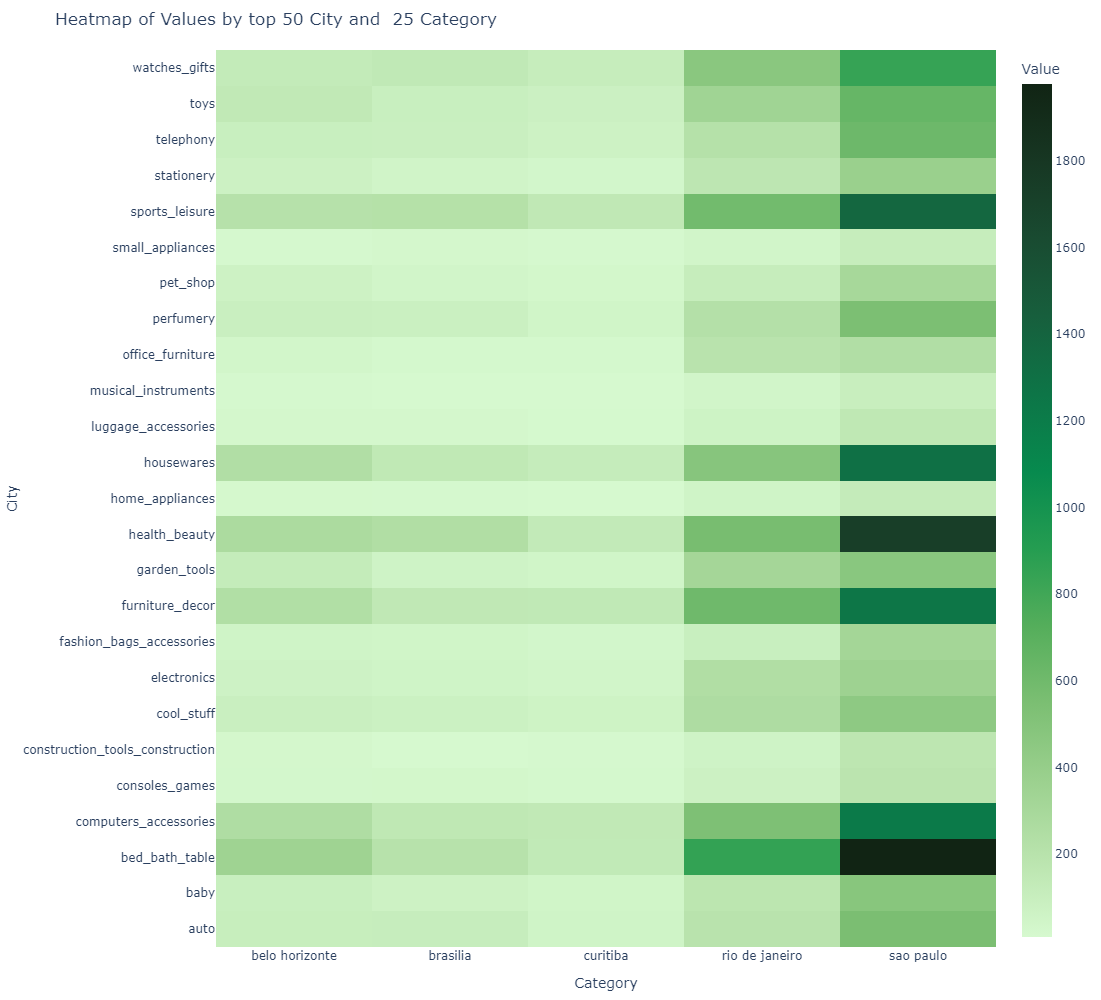

In [16]:
import plotly.graph_objects as go

# Assuming you have 'pivot_table' from the previous example
# If not, you can create a sample DataFrame and pivot_table as follows:
# pivot_table = pd.pivot_table(df, values='Value', index='Date', columns='Category', aggfunc='sum')

# Define the trace for the heatmap
trace = go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='algae',  # You can choose any colorscale
    colorbar=dict(title='Value'),  # Title for the colorbar
    zmin=pivot_table.values.min(),  # Min value for the color scale
    zmax=pivot_table.values.max(),  # Max value for the color scale
    hoverongaps=False  # Prevent displaying hover information for missing values
)

# Define the layout
layout = go.Layout(
    title='Heatmap of Values by top 50 City and  25 Category',
    xaxis=dict(title='Category'),
    yaxis=dict(title='City'),
    margin=dict(l=50, r=50, t=50, b=50)  # Add margin to the plot
)

# Create the figure with specified size
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(width=1000, height=1000)  # Adjust width and height of the figure

# Show the figure
fig.show()

In [17]:
category_state_customer = ordered_product_details[['order_id' , 'product_id' , 'order_purchase_timestamp' ,  'customer_state' , 'product_category_name_english']]

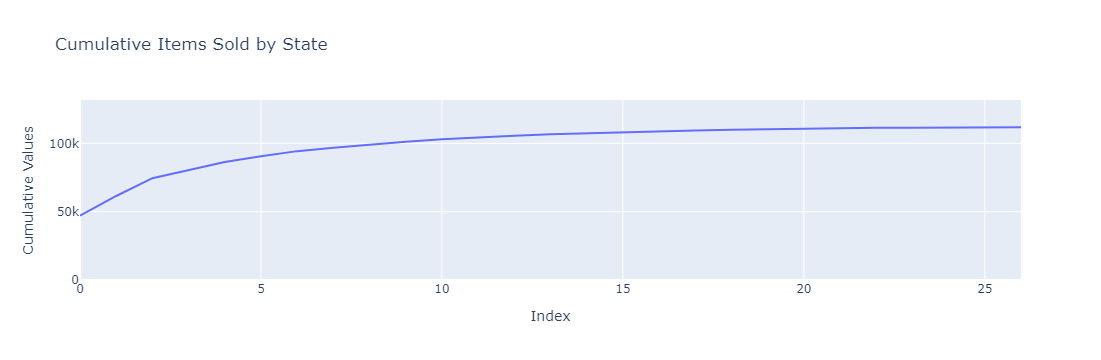

In [18]:
import plotly.express as px

customer_state = category_state_customer['customer_state'].value_counts().to_frame().reset_index()
customer_state['cumulative'] = customer_state['count'].cumsum()

fig = px.line(customer_state, x = list(range(customer_state.shape[0])) , y='cumulative', title='Cumulative Items Sold by State' )
fig.update_xaxes(title='Index')
fig.update_yaxes(title='Cumulative Values', range=[0, customer_state['cumulative'].max() + 20000])  # Set y-axis range from 0 to max value
fig.show()

In [19]:
customer_state

,customer_state,count,cumulative
0,SP,47034,47034
1,RJ,14460,61494
2,MG,13025,74519
3,RS,6190,80709
4,PR,5689,86398
5,SC,4148,90546
6,BA,3781,94327
7,DF,2389,96716
8,GO,2315,99031
9,ES,2244,101275


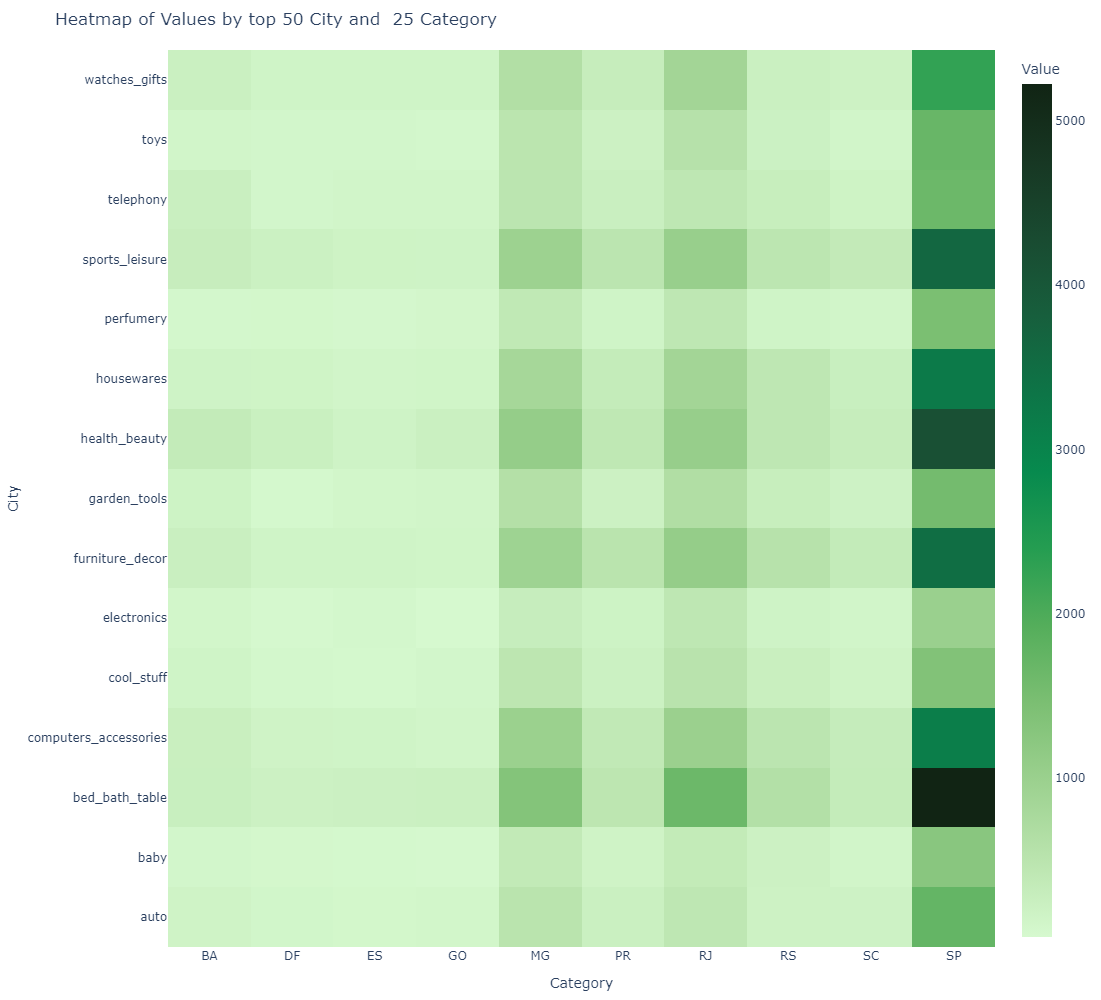

In [20]:
customer_state = category_state_customer['customer_state'].value_counts()
customer_category = category_state_customer['product_category_name_english'].value_counts()


top_state = customer_state.index[:10]
top_category = customer_category.index[:15]


f1 = category_state_customer['customer_state'].isin(top_state) ## top city and cateogry
f2 = category_state_customer['product_category_name_english'].isin(top_category)
df = category_state_customer[(f1 & f2)]
pivot_table=pd.pivot_table(df , values='order_id' , index='product_category_name_english' , columns = 'customer_state', aggfunc='count')                                                     


import plotly.graph_objects as go
# Assuming you have 'pivot_table' from the previous example
# If not, you can create a sample DataFrame and pivot_table as follows:
# pivot_table = pd.pivot_table(df, values='Value', index='Date', columns='Category', aggfunc='sum')


# Define the trace for the heatmap
trace = go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='algae',  # You can choose any colorscale
    colorbar=dict(title='Value'),  # Title for the colorbar
    zmin=pivot_table.values.min(),  # Min value for the color scale
    zmax=pivot_table.values.max(),  # Max value for the color scale
    hoverongaps=False  # Prevent displaying hover information for missing values
)


# Define the layout
layout = go.Layout(
    title='Heatmap of Values by top 50 City and  25 Category',
    xaxis=dict(title='Category'),
    yaxis=dict(title='City'),
    margin=dict(l=50, r=50, t=50, b=50)  # Add margin to the plot
)


# Create the figure with specified size
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(width=1000, height=1000)  # Adjust width and height of the figure


# Show the figure
fig.show()

In [21]:
result = olist_customers_dataset.groupby('customer_state').agg(unique_customer_count=('customer_unique_id', 'nunique')).sort_values('unique_customer_count' , ascending=False).reset_index()

In [22]:
result

,customer_state,unique_customer_count
0,SP,40302
1,RJ,12384
2,MG,11259
3,RS,5277
4,PR,4882
5,SC,3534
6,BA,3277
7,DF,2075
8,ES,1964
9,GO,1952


In [23]:
olist_customers_dataset[ olist_customers_dataset['customer_state'] == 'SP' ]['customer_unique_id'].nunique()

40302

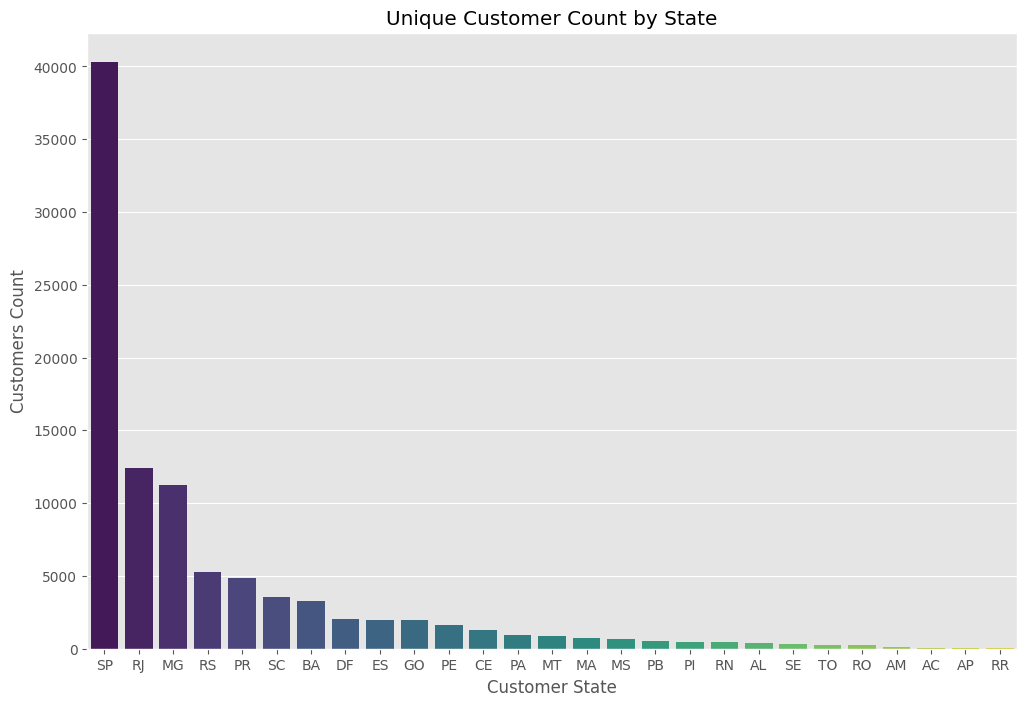

In [24]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=result, x='customer_state', y='unique_customer_count', palette='viridis')

# Customize the plot
plt.title('Unique Customer Count by State')
plt.xlabel('Customer State')
plt.ylabel('Customers Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()